<!-- ### APPLICA DBSCAN -->

In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

# Add these imports at the top
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import DBSCAN



<!-- ### features -->

In [93]:
df = pd.read_csv("pp_train.csv")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16131 entries, 0 to 16130
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16131 non-null  object 
 1   rating                       16131 non-null  int64  
 2   startYear                    16131 non-null  int64  
 3   endYear                      15346 non-null  float64
 4   runtimeMinutes               11537 non-null  float64
 5   awardWins                    16131 non-null  float64
 6   numVotes                     16131 non-null  int64  
 7   totalImages                  16131 non-null  int64  
 8   totalVideos                  16131 non-null  int64  
 9   totalCredits                 16131 non-null  int64  
 10  criticReviewsTotal           16131 non-null  int64  
 11  titleType                    16131 non-null  object 
 12  awardNominationsExcludeWins  16131 non-null  int64  
 13  canHaveEpisodes 

In [95]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [96]:
df = df[df["outlier_w_type"] != True]

<!-- ## ? giusto nel clustering non usare variabili imputate? -->

In [97]:
# FILE VECCHIO
# features = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages','totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins','numRegions', 'userReviewsTotal']]

In [98]:


features = df[['numVotes', 
                #'startYear', 'numRegions',
                #'totalCredits', 
                'criticReviewsTotal', 
               'userReviewsTotal',
               'fill_runtimeMinutes_Bruno', 
               'totalNominations', 
               #'totalMedia',
              #'countryOfOrigin_freq_enc'
                 ]]



# SI
    # DA PRIMA -> 
    #   'startYear', 'numVotes', 'totalCredits', 'criticReviewsTotal','numRegions', 'userReviewsTotal'

    # SOSTITUITE ('awardWins', 'totalImages','totalVideos','awardNominationsExcludeWins') ('fill_runtimeMinutes')
        # 'totalNominations', 'totalMedia' +  'fill_runtimeMinutes_Bruno'
            # penso no ->  'runtimeMinutes_notitletype']

# NO
    # PRIMA NO -> ora vediamo
            # 'rating', 
            # 'titleType', 
            # 'canHaveEpisodes', 
            # 'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography','is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short','is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
            # 'countryOfOrigin'
        
    # NUOVI DUBBI
            # ? -> 'countryOfOrigin_freq_enc', ->CASINO
        # ? -> 'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA','countryOfOrigin_UNK',


df_num = features.values

#presuppongo di voler fare poi i controlli cluster in abse a titletype
y = np.array(df['titleType']) 
#a way to define x and y; they are the numpy arrays of the dataset

y_map = {
    0: 'tvEpisode',
    1: 'videoGame',
    2: 'movie',
    3: 'tvSeries',
    4: 'video',
    5: 'tvMiniSeries',
    6: 'short',
    7: 'tvMovie',
    8: 'tvSpecial',
    9: 'tvShort'
}
y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)
#y is our target label; mapped into strings (y_map)

<!-- ## Normalizzazioni -->

In [99]:
X = df_num.copy()
X = np.log1p(X)

# z-score, fit and then transform
scaler = StandardScaler()   #inizialize the standard scaler
scaler.fit(X) #fit the scaler on the data; x è la numpy matrix of the dataset
X_z_scal = scaler.transform(X) #transform to have the scaled version


# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X) #fit e scaler in una riga sola

#SCELTA NORMALIZZAZIONE
#X_scal = X_z_scal
X_scal = X_minmax  

In [100]:
# #VERSIONE VECCHIA

# #solo con 2 cluster
#     #dbscan = DBSCAN(eps=2, min_samples=22, metric="euclidean")
#     #dbscan = DBSCAN(eps=1.98, min_samples=11, metric="euclidean")
#     #dbscan = DBSCAN(eps=2, min_samples=12, metric="euclidean")

# #con 3 cluster
# #dbscan = DBSCAN(eps=1.55, min_samples=22, metric="euclidean")
#             # in teoria no #dbscan = DBSCAN(eps=2, min_samples=11, metric="euclidean") 

# #dbscan = DBSCAN(eps=1.565, min_samples=17, metric="euclidean") 
# dbscan = DBSCAN(eps=1.564, min_samples=11, metric="euclidean") #-> 3 cluster, UN PO' MEGLIO COME VALORI

# dbscan.fit(X_scal)

<!-- # da rimettereeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee -->

In [101]:
# d
dbscan = DBSCAN(eps=0.12, min_samples=8, metric="euclidean") 

dbscan.fit(X_scal)

DBSCAN(eps=0.12, min_samples=8)

In [102]:
dbscan.labels_ #get labels (classification of the diff clusters (-1 è il noise))
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([  299, 12489,  2153,     6,     8], dtype=int64))

In [103]:
# #CODICE LUNGO PER PROVARE VARIE COMBINAZIONI DI EPS E MIN_SAMPLES

# from sklearn.cluster import DBSCAN
# import numpy as np

# #Nooutliers, std scaler
# # eps_list = [1.6, 1.8, 2.0, 2.1,2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]
# # min_samples_list = [4,5, 7, 8, 9, 10, 11, 15]

# #Nooutliers, minmax scaler
# eps_list = [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.24, 0.26, 0.3, 0.4, 1.0, ]
# min_samples_list = [4,5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]

# for eps in eps_list:
#     for ms in min_samples_list:
#         db = DBSCAN(eps=eps, min_samples=ms).fit(X_scal)
#         labels, counts = np.unique(db.labels_, return_counts=True)
#         n_clusters = len(labels) - (1 if -1 in labels else 0)
#         n_noise = counts[labels == -1][0] if -1 in labels else 0
#         if n_clusters > 1:
#             silhouette_avg = silhouette_score(X_scal, db.labels_)
#             if silhouette_avg > 0.1:
#                 lab = np.unique(db.labels_, return_counts=True)
#                 print(f"eps={eps:.2f}, min_samples={ms} → Clusters: {n_clusters}, Noise: {n_noise}, Silhouette Score: {silhouette_avg:.4f}, Composition: {lab} ")
            



<!-- # da rimettereeeeeeeeeeeeeeeeeeeeeeeeeeeeee -->

<!-- ### Silhouette -->

In [104]:
print('Silhouette', silhouette_score(X_scal, dbscan.labels_)) #con noise cluster

print('Silhouette', silhouette_score(X_scal[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1]))  #senza noise

#         # misura silh su DBSCAN LABELS la conta anche rispetto al noise cluster (-1) 
#         # -> se non lo consid abbiamo valore + alto (i noise points sono lontani, lunghe distanze influenzano la silh) 
#             # -> quando la misuro scartiamo anche noise così misuriamo risultato solo sui cluster

Silhouette 0.20815842053508765
Silhouette 0.21937711505990784


In [105]:
""" 
sns.scatterplot(data=df,x="criticReviewsTotal", y="numVotes", 
                hue=dbscan.labels_, style=dbscan.labels_, palette="bright")
plt.show()
"""

' \nsns.scatterplot(data=df,x="criticReviewsTotal", y="numVotes", \n                hue=dbscan.labels_, style=dbscan.labels_, palette="bright")\nplt.show()\n'

<!-- ### Kth neighbor distance (misuro distanzde dal kth nearest n.) -->

In [106]:
dist = pdist(X_scal, 'euclidean') 
dist = squareform(dist)

    #risultato -> array compresso con distanze per ogni coppia di punti nel dataset.

<!-- #### PLOT DISTANZE -> misuro distanze dal kth, xth, yth nearest n.
##### utile se data is larger, provare con diversi valori di k (pox si rivelino clusters) -->

In [107]:
# #plot k vecchio
# #strandardscaler ks = [11, 16, 22, 64]
# from kneed import KneeLocator


# ks = [11, 16, 22, 64]


# fig = plt.figure(figsize=(16, 3)) # dimensions of the overall plot
# fig_dims = (1, len(ks))

# for i in range(len(ks)):
#     k = ks[i]
#     kth_distances = []

#     for d in dist:  # d is a vector containing distances between the ith record and all the others
#         index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
#         kth_distances.append(d[index_kth_distance])  # store the distance in a list

#     plt.subplot2grid(fig_dims, (0, i))
#     plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
#     plt.ylabel('distance from the {}th neighbor'.format(k))
#     plt.grid(True, alpha=0.3)
             
# #plt.tight_layout()
# #fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# plt.show()


### plot iniziale -> a cui aggiungere linnee orizzontali che evidenzino area analizzata

#### eventualmente cambia poi valori

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# ks = [5, 10, 15, 20, 30, 50]
# all_kth_distances = {}

# # Calcola e salva le distanze k-esime ordinate per ogni k
# for k in ks:
#     kth_distances = []

#     for d in dist:  # d è un array di distanze dalla riga i-esima agli altri punti
#         index_kth_distance = np.argsort(d)[k]
#         kth_distances.append(d[index_kth_distance])
    
#     all_kth_distances[k] = sorted(kth_distances)

# # Plot
# plt.figure(figsize=(10, 6))
# for k in ks:
#     plt.plot(range(len(all_kth_distances[k])), all_kth_distances[k], label=f'k = {k}')

# plt.title('k-th Nearest Neighbor Distances')
# plt.xlabel('Data points (sorted)')
# plt.ylabel('Distance to k-th neighbor')
# plt.grid(True, alpha=0.3)
# plt.legend(title='k')
# plt.tight_layout()
# plt.show()


# from kneed import KneeLocator

# for k in ks:
#     distances = all_kth_distances[k]
#     x = range(len(distances))
#     kl = KneeLocator(x, distances, curve='convex', direction='increasing')
#     print(f'k = {k} → Knee at index {kl.knee}, distance = {distances[kl.knee] if kl.knee else "N/A"}')


 <!-- ### codice per trovare valore di eps automaticamente -->

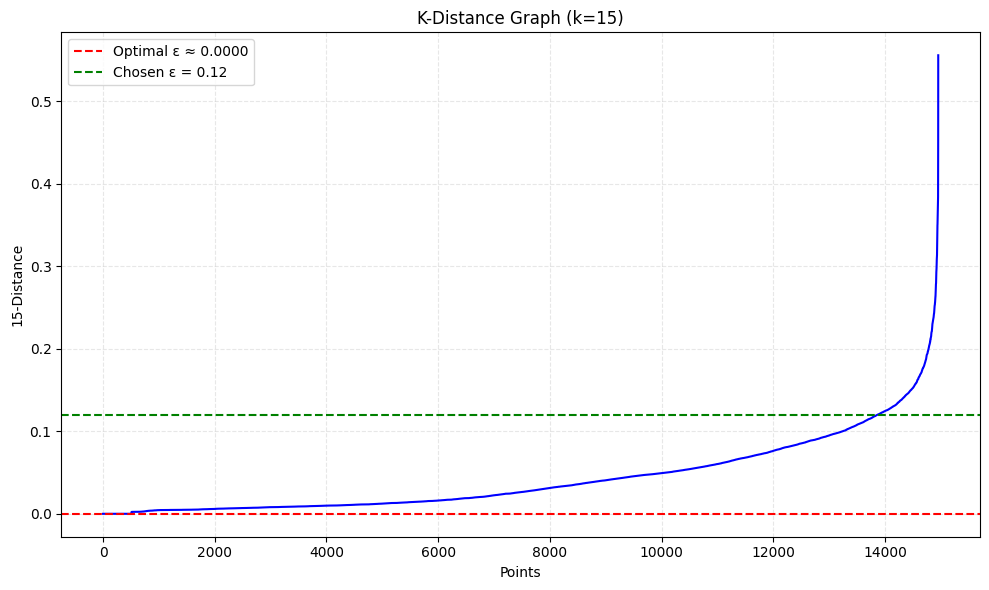

Suggested Optimal Epsilon: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from kneed import KneeLocator

def calculate_k_distance_graph(X, k):
    """
    Calculate the k-distance graph for a pre-scaled dataset
    
    Parameters:
    -----------
    X : numpy array
        Pre-scaled input dataset
    k : int
        Number of nearest neighbors to consider
    
    Returns:
    --------
    k_distances : numpy array
        Sorted k-distances for each point
    """
    # Calculate pairwise distances
    distances = pdist(X)
    dist_matrix = squareform(distances)
    
    # Sort distances for each point and get k-th distances
    k_distances = np.sort(dist_matrix, axis=1)[:, k]
    
    return k_distances

def plot_k_distance_graph(X, k):
    """
    Plot the k-distance graph to help select epsilon for DBSCAN
    using Kneedle algorithm
    
    Parameters:
    -----------
    X : numpy array
        Pre-scaled input dataset
    k : int
        Number of nearest neighbors to consider
    
    Returns:
    --------
    optimal_epsilon : float
        Suggested optimal epsilon value
    """
    # Calculate k-distances
    k_distances = calculate_k_distance_graph(X, k)
    
    # Sort k-distances in ascending order
    sorted_k_distances = np.sort(k_distances)


    
    # Use Kneedle algorithm to find the knee point
    try:

        kneedle = KneeLocator(
            range(len(k_distances)), 
            sorted_k_distances, 
            curve="concave", 
            direction="increasing"
        )
        
        # Get the optimal epsilon (knee point)
        optimal_epsilon = sorted_k_distances[kneedle.knee] if kneedle.knee is not None else None
        
        # Plot k-distance graph
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(sorted_k_distances)), sorted_k_distances, 'b-')
        plt.title(f'K-Distance Graph (k={k})')
        plt.xlabel('Points')
        plt.ylabel(f'{k}-Distance')
        
        # Plot red line for optimal epsilon if found
        if optimal_epsilon is not None:
            plt.axhline(y=optimal_epsilon, color='r', linestyle='--', 
                        label=f'Optimal ε ≈ {optimal_epsilon:.4f}')
            plt.legend()
        
        plt.axhline(y=0.12, color='g', linestyle='--', 
                    label='Chosen ε = 0.12')
        
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        return optimal_epsilon
    
    except Exception as e:
        print(f"Error finding optimal epsilon: {e}")
        return None

def main(X):
    """
    Main function to find optimal epsilon for DBSCAN
    
    Parameters:
    -----------
    X : numpy array
        Pre-scaled input dataset
    """
    # Plot k-distance graph and find optimal epsilon
    optimal_epsilon = plot_k_distance_graph(X, k=15)
    
    if optimal_epsilon is not None:
        print(f"Suggested Optimal Epsilon: {optimal_epsilon:.4f}")
    else:
        print("Could not determine optimal epsilon")
    
    return optimal_epsilon

# Example usage
if __name__ == '__main__':
    X = X_scal
    
    # Call main function with your pre-scaled data
    main(X_scal)




<!-- # prove visualizzazione  -->

<!-- ### min max - no outlier -->

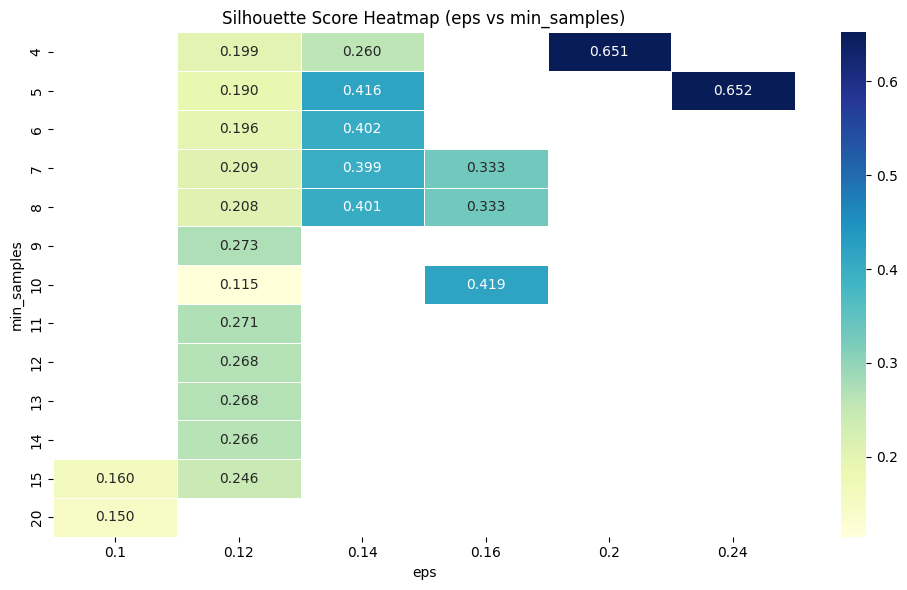

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Esempio: crea un DataFrame con i tuoi dati
data = {
    "eps": [
        0.10, 0.10,
        0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
        0.14, 0.14, 0.14, 0.14, 0.14,
        0.16, 0.16, 0.16,
        0.20,
        0.24
    ],
    "min_samples": [
        15, 20,
        4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
        4, 5, 6, 7, 8,
        7, 8, 10,
        4,
        5
    ],
    "silhouette": [
        0.1598, 0.1496,
        0.1994, 0.1895, 0.1960, 0.2086, 0.2082, 0.2734, 0.1150, 0.2705, 0.2680, 0.2676, 0.2657, 0.2459,
        0.2596, 0.4156, 0.4015, 0.3994, 0.4007,
        0.3327, 0.3328, 0.4188,
        0.6512,
        0.6520
    ]
}



df_res = pd.DataFrame(data)

# Pivot per creare la heatmap
heatmap_data = df_res.pivot(index='min_samples', columns='eps', values='silhouette')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.5)
plt.title("Silhouette Score Heatmap (eps vs min_samples)")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.tight_layout()
plt.show()


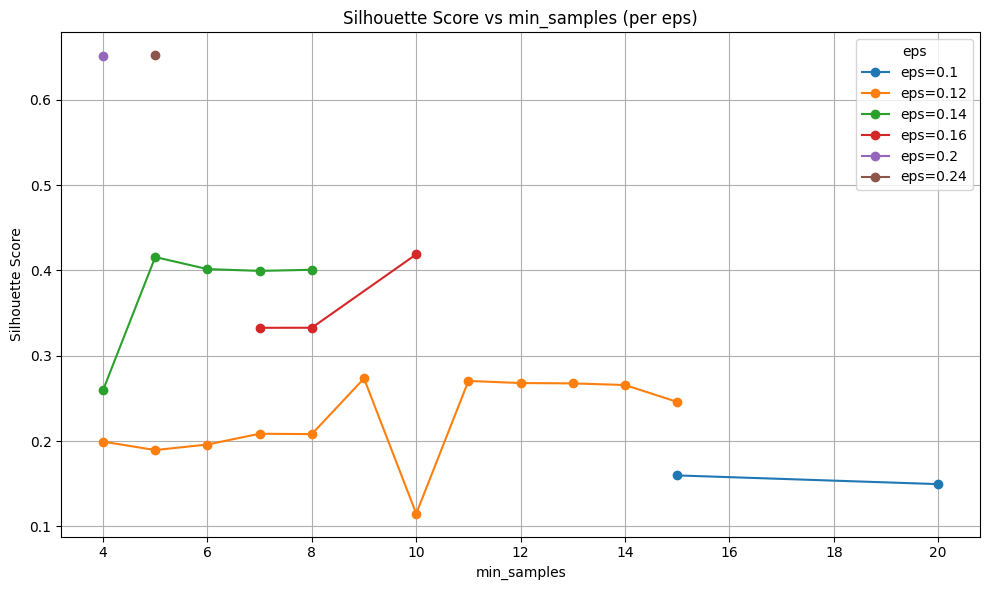

In [111]:
plt.figure(figsize=(10, 6))
for eps_value in sorted(df_res['eps'].unique()):
    subset = df_res[df_res['eps'] == eps_value]
    plt.plot(subset['min_samples'], subset['silhouette'], marker='o', label=f'eps={eps_value}')

plt.title("Silhouette Score vs min_samples (per eps)")
plt.xlabel("min_samples")
plt.ylabel("Silhouette Score")
plt.legend(title="eps")
plt.grid(True)
plt.tight_layout()
plt.show()


<!-- ### PCA PER VISUALIZZARLO -->

## PCA

In [112]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def determine_pca_components(df):
#     # Select clustering variables ------------------------------------------------->   
# # features = df[[''numVotes', 
            #     'criticReviewsTotal', 
            #    'userReviewsTotal',
            #    'fill_runtimeMinutes_Bruno', 
            #    'totalNominations', 
# #                  ]]

#     features = ["startYear", 
#                     "numVotes", 
#                     "totalCredits",
#                     "numRegions", 
#                     "userReviewsTotal",
#                     # 'totalNominations', 
#                     'totalMedia', 
#                     "criticReviewsTotal"]
#     X = df[features]
    
#     # Apply log transformation to handle skewness
#     X = np.log1p(X)
    
#     # Scale data
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
    
    # Perform PCA
    pca = PCA()
    pca.fit(X_scal)
    
    # Calculate cumulative explained variance ratio
    cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Determine optimal number of components
    for i, ratio in enumerate(cum_var_ratio):
        if ratio >= 0.8:
            return i + 1
    
    return len(cum_var_ratio)


pp_train = pd.read_csv('pp_train.csv')
optimal_components = determine_pca_components(pp_train)
print(f"Optimal number of principal components: {optimal_components}")

Optimal number of principal components: 2


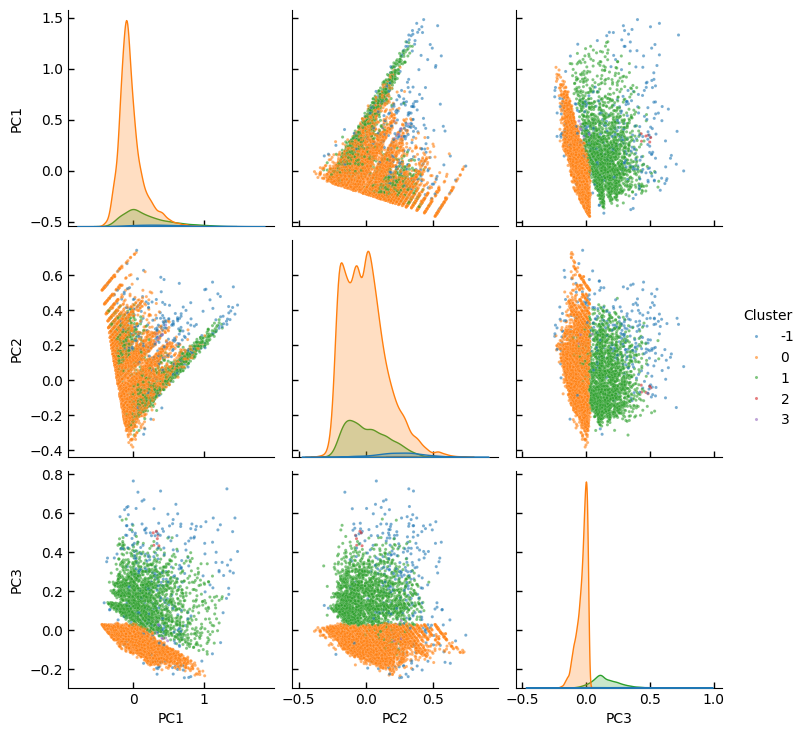

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

optimal_components = 3

def plot_pca_dbscan(df, features, n_components=optimal_components, eps=0.12, min_samples=8):
    """
    Apply PCA and DBSCAN clustering to the dataset and visualize the results.
    
    :param df: DataFrame with the original data
    :param features: List of features to use
    :param n_components: Number of principal components for PCA
    :param eps: DBSCAN epsilon parameter
    :param min_samples: DBSCAN min_samples parameter
    """
    # # Preprocessing: Log-transform and scaling
    # X = df[features].copy()
    # X = np.log1p(X)  # Log-transform to stabilize variance
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scal)
    
    # Create a DataFrame with principal components
    pca_columns = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)
    
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scal)
    
    # Add cluster labels to the DataFrame
    pca_df['Cluster'] = labels
    
    # Convert noise points (-1) to a separate category for visualization
    unique_clusters = np.unique(labels)
    num_clusters = len(unique_clusters)
    palette = sns.color_palette("tab10", num_clusters) if num_clusters > 1 else "tab10"
    
    # Visualize with Seaborn pairplot


    # sns.pairplot(
    #     data=pca_df,
    #     vars=["PC1", "PC2", "PC3", "PC4", "PC5"],
    #     hue="Cluster",
    #     diag_kind="kde",
    #     palette="tab10"
    # )

    g =sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", "PC3"],
        hue="Cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
    )

     # Aggiungere stanghette agli assi per ogni subplot
    for ax_row in g.axes:
        for ax in ax_row:
            if ax is not None:
                ax.tick_params(
                    axis='both',  # Applica a entrambi gli assi
                    direction='in',  # Stanghette verso l'interno
                    length=4,  # Lunghezza delle stanghette
                    width=1,  # Spessore delle stanghette
                    which='both'  # Applica sia a major che a minor ticks
                )
                
                

    plt.show()



    plt.show()

# Example usage:
features = [
'numVotes', 
                #'startYear', 'numRegions',
                #'totalCredits', 
                'criticReviewsTotal', 
               'userReviewsTotal',
               'fill_runtimeMinutes_Bruno', 
               'totalNominations', 
]

# Assuming the DataFrame is called pp_train
plot_pca_dbscan(X_scal, features,  n_components=optimal_components, eps=0.12, min_samples=8)

## pca gaia

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pca_kmeans(df, features, n_components=5, n_clusters=4):
    """
    Applica PCA e K-Means ai dati preprocessati e visualizza i risultati.

    :param df: DataFrame originale con i dati
    :param features: Lista delle feature da utilizzare
    :param n_components: Numero di componenti principali per la PCA
    :param n_clusters: Numero di cluster per il K-Means
    """
    # Preprocessamento: Log-transform e scaling
    X = df[features].copy()
    X = np.log1p(X)  # Log-transform
    scaler = MinMaxScaler()
    # scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Applica PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # Crea un DataFrame con le componenti principali
    pca_columns = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)

    # Applica K-Means sui dati preprocessati (X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    # Aggiungi i cluster come colonna al DataFrame delle componenti principali
    pca_df['cluster'] = clusters

    sns.pairplot(
        data=pca_df,
        vars=["PC1", "PC2", 'PC3'],
        hue="cluster",
        diag_kind="kde",
        palette="tab10",
        plot_kws={"s": 5, "alpha": 0.6, 'linewidth':0.1},
    )

    plt.show()

features = [
                    "startYear", 
                    "numVotes", 
                    "totalCredits",
                    "numRegions", 
                    "userReviewsTotal",
                    # 'totalNominations', 
                    'totalMedia', 
                    "criticReviewsTotal"
]


plot_pca_kmeans(pp_train, features, n_components=3, n_clusters=3) 


# plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\pairplot_kmeans.png')


<!-- visualizzazione vecchia -> ma con al fondo i dati di info clusters e spiegazione variabilità -->

In [114]:
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import DBSCAN
# import matplotlib.pyplot as plt
# import numpy as np

# # Create DBSCAN model with your chosen parameters
# dbscan = DBSCAN(eps=1.564, min_samples=11)  # Add your values here
# labels = dbscan.fit_predict(X_scal)

# # Apply PCA
# pca = PCA(n_components=5)
# X_pca = pca.fit_transform(X_scal)

# # Create a figure with a grid of subplots
# fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# # Add title with DBSCAN parameters
# plt.suptitle(f'DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})', 
#              y=1.02, fontsize=12)

# # Create labels for each axis
# pc_labels = [f'PC{i+1}' for i in range(5)]

# # Plot each combination
# for i in range(5):
#     for j in range(5):
#         if i != j:
#             # Scatter plot
#             axes[i, j].scatter(X_pca[:, j], X_pca[:, i], 
#                              c=labels, cmap='Set2',
#                              alpha=0.5, s=20)
#             axes[i, j].set_xlabel(pc_labels[j])
#             axes[i, j].set_ylabel(pc_labels[i])
#         else:
#             # Density plot
#             for label in np.unique(labels):
#                 sns.kdeplot(data=X_pca[labels == label, i],
#                           ax=axes[i, i], fill=True,
#                           alpha=0.5)
#             axes[i, i].set_xlabel(pc_labels[i])
#             axes[i, i].set_ylabel('Density')

# # Add legend
# handles = [plt.scatter([], [], c=c, alpha=0.5, label=f'Cluster {l}')
#            for l, c in zip(np.unique(labels),
#                           plt.cm.Set2(np.linspace(0, 1, len(np.unique(labels)))))]
# fig.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.02, 0.8))

# # Adjust layout
# plt.tight_layout()
# plt.show()

# # Print explained variance ratios
# print("\nExplained variance ratios:")
# for i, ratio in enumerate(pca.explained_variance_ratio_):
#     print(f"PC{i+1}: {ratio:.3f}")

# # Print clustering information
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise = list(labels).count(-1)
# print(f"\nNumber of clusters: {n_clusters}")
# print(f"Number of noise points: {n_noise}")

<!-- ### codice per vedere sia plot che statistiche decsrittive dei cluster -->


Statistiche dei Cluster:
--------------------------------------------------

Cluster -1:
Numero di punti: 299
Percentuale del dataset: 2.00%
Deviazione standard media delle features: 0.236
Range medio delle features: 1.000

Cluster 0:
Numero di punti: 12489
Percentuale del dataset: 83.51%
Deviazione standard media delle features: 0.103
Range medio delle features: 0.643

Cluster 1:
Numero di punti: 2153
Percentuale del dataset: 14.40%
Deviazione standard media delle features: 0.167
Range medio delle features: 0.789

Cluster 2:
Numero di punti: 6
Percentuale del dataset: 0.04%
Deviazione standard media delle features: 0.032
Range medio delle features: 0.091

Cluster 3:
Numero di punti: 8
Percentuale del dataset: 0.05%
Deviazione standard media delle features: 0.038
Range medio delle features: 0.121


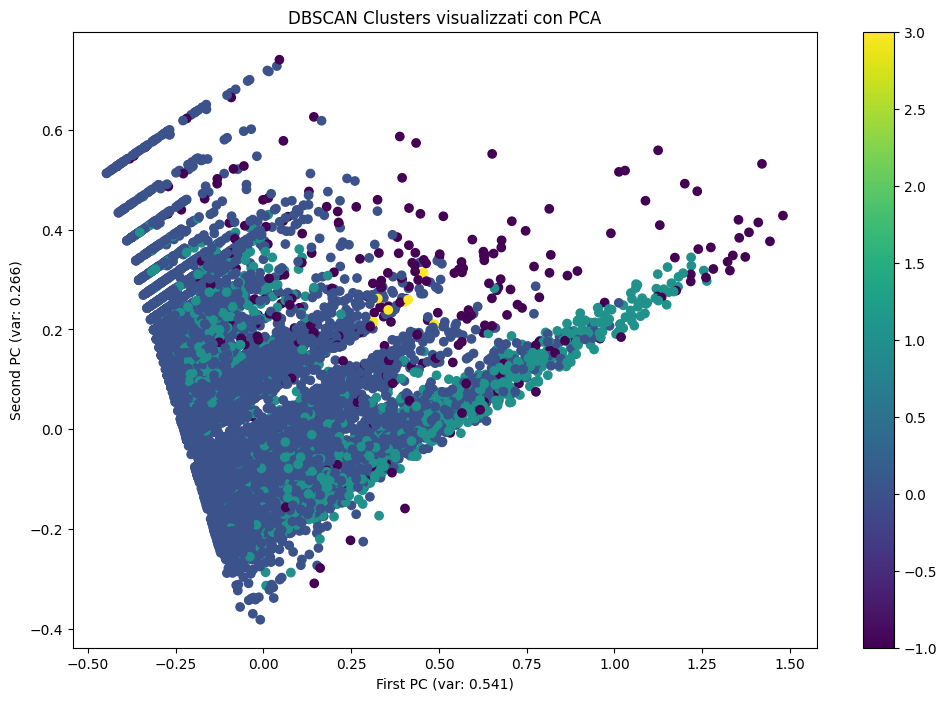

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# Visualizzazione con PCA
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scal)

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap='viridis')
plt.colorbar(scatter)
plt.title('DBSCAN Clusters visualizzati con PCA')
plt.xlabel(f'First PC (var: {pca.explained_variance_ratio_[0]:.3f})')
plt.ylabel(f'Second PC (var: {pca.explained_variance_ratio_[1]:.3f})')

# Statistiche per cluster
def cluster_statistics(X, labels):
    stats = {}
    unique_labels = np.unique(labels)
    
    for label in unique_labels:
        mask = labels == label
        cluster_points = X[mask]
        
        stats[f'Cluster {label}'] = {
            'Size': len(cluster_points),
            'Percentage': f"{(len(cluster_points) / len(X) * 100):.2f}%",
            'Mean': np.mean(cluster_points, axis=0),
            'Std': np.std(cluster_points, axis=0),
            'Min': np.min(cluster_points, axis=0),
            'Max': np.max(cluster_points, axis=0)
        }
    
    return stats

# Calcola e mostra le statistiche
stats = cluster_statistics(X_scal, dbscan.labels_)

print("\nStatistiche dei Cluster:")
print("-" * 50)
for cluster, stat in stats.items():
    print(f"\n{cluster}:")
    print(f"Numero di punti: {stat['Size']}")
    print(f"Percentuale del dataset: {stat['Percentage']}")
    print(f"Deviazione standard media delle features: {np.mean(stat['Std']):.3f}")
    print(f"Range medio delle features: {np.mean(stat['Max'] - stat['Min']):.3f}")